# Foundations of Machine Learning Frameworks - CSCN8010

# Practical Lab 2: Multivariate Linear Regression, Non-Parametric Models and Cross-Validation


### **Name** - Kumari Nikitha Singh

### **Student Id**- 9053016

## Step 1: Load the Diabetes Dataset

We start by loading the built-in diabetes dataset from `scikit-learn`. This dataset contains 10 baseline variables, such as age, sex, BMI, and blood pressure, which are used to predict the disease progression one year after baseline.


In [26]:
# Import required library
import pandas as pd
from sklearn import datasets

# Load diabetes dataset as pandas DataFrame
diabetes_data = datasets.load_diabetes(as_frame=True)

# Extract features and target into a single DataFrame for convenience
df = diabetes_data.frame

# Show the shape of the dataset
print(f"Dataset shape: {df.shape} (rows, columns)")

# Show the first 5 rows of the dataset
df.head()


Dataset shape: (442, 11) (rows, columns)


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


The size of the dataset is 442 rows (patients) with 11 columns(10 features + 1 target).
The features are: age, sex, BMI, blood pressure, and the blood serum.
The target column is called `target` and it is the progression of the disease in a years time measured after the baseline.

## Step 2 - Frame the Problem


The main goal of this lab is to **predict the progression of diabetes** in patients one year after their baseline measurements.

This is a **regression problem**, since the target variable (named `target`) is a continuous numerical value representing disease progression.

### Problem Type:
- **Supervised Learning**
- **Regression**

### Target Variable:
- `target` — a quantitative measure of diabetes progression 1 year after baseline.

### Feature Variables:
- `age`, `sex`, `bmi`, `bp`, `s1`, `s2`, `s3`, `s4`, `s5`, `s6`


In [27]:
# Display first few values of the target column
df['target'].head()


0    151.0
1     75.0
2    141.0
3    206.0
4    135.0
Name: target, dtype: float64

## Step 3 - Exploratory Data Analysis (EDA)

In this step, we will:
- Summarize the data with basic statistics
- Plot histograms for each feature
- Create scatter plots against the target variable
- Generate a correlation heatmap
- Extract useful insights


### - Summary statistics of the dataset


In [28]:
# Summary statistics of the dataset as a DataFrame
df.describe().T  


,count,mean,std,min,25%,50%,75%,max
age,442.0,-2.511817e-19,0.047619,-0.107226,-0.037299,0.005383,0.038076,0.110727
sex,442.0,1.230790e-17,0.047619,-0.044642,-0.044642,-0.044642,0.050680,0.050680
bmi,442.0,-2.245564e-16,0.047619,-0.090275,-0.034229,-0.007284,0.031248,0.170555
bp,442.0,-4.797570e-17,0.047619,-0.112399,-0.036656,-0.005670,0.035644,0.132044
s1,442.0,-1.381499e-17,0.047619,-0.126781,-0.034248,-0.004321,0.028358,0.153914
s2,442.0,3.918434e-17,0.047619,-0.115613,-0.030358,-0.003819,0.029844,0.198788
s3,442.0,-5.777179e-18,0.047619,-0.102307,-0.035117,-0.006584,0.029312,0.181179
s4,442.0,-9.042540e-18,0.047619,-0.076395,-0.039493,-0.002592,0.034309,0.185234
s5,442.0,9.293722e-17,0.047619,-0.126097,-0.033246,-0.001947,0.032432,0.133597
s6,442.0,1.130318e-17,0.047619,-0.137767,-0.033179,-0.001078,0.027917,0.135612


The above summary presents us with an idea of how the features were distributed.
Note: Standardization of the features was done to have a mean of around 0.

### - Histograms for Feature Distribution

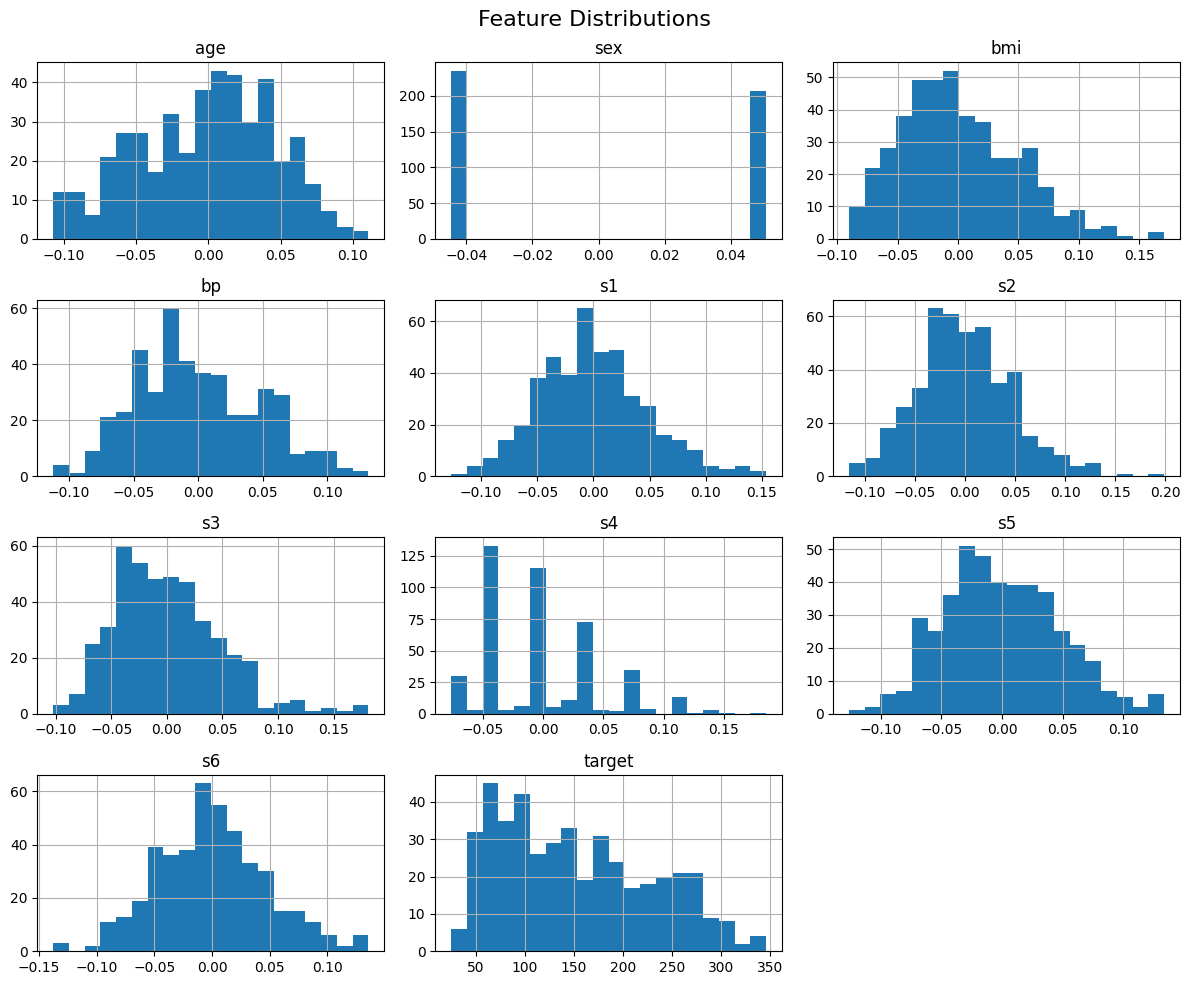

In [29]:
import matplotlib.pyplot as plt

# Plot histograms for all features
df.hist(bins=20, figsize=(12, 10))
plt.suptitle('Feature Distributions', fontsize=16)
plt.tight_layout()
plt.show()


### - Scatter Plots ( Feature vs Target)

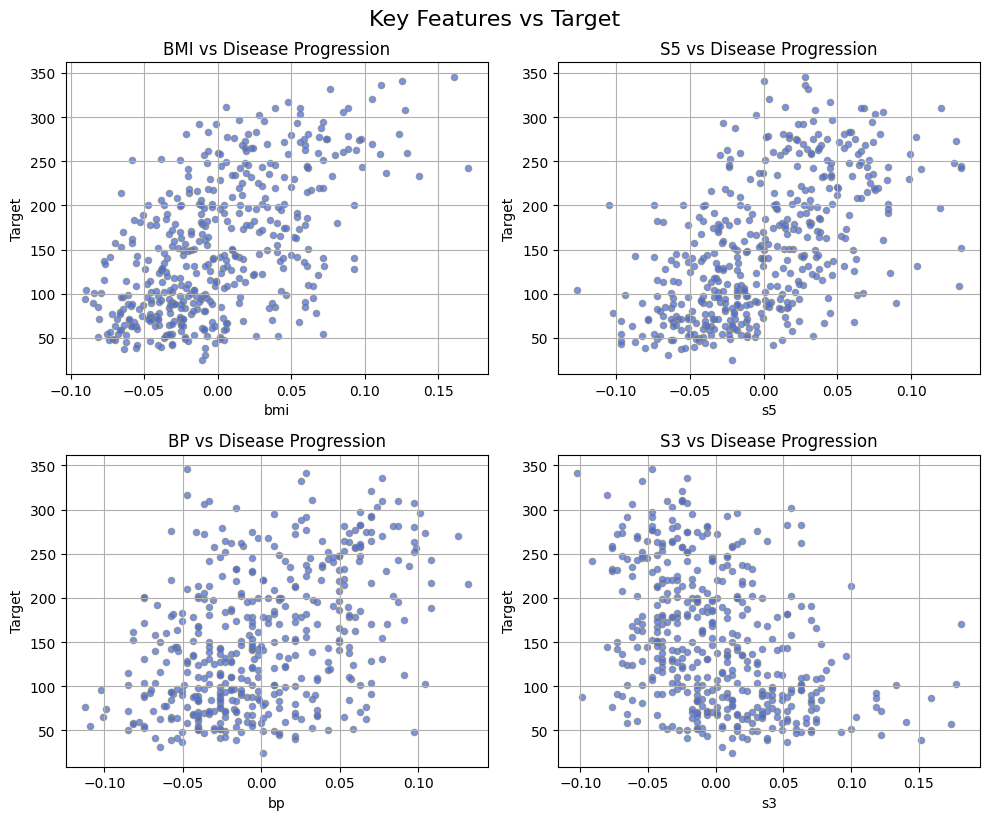

In [30]:
# Scatter plots with smaller, clear dots
plt.figure(figsize=(10, 8))
top_features = ['bmi', 's5', 'bp', 's3']

for i, feature in enumerate(top_features):
    plt.subplot(2, 2, i + 1)
    plt.scatter(df[feature], df['target'], alpha=0.7, s=20, color='royalblue', edgecolors='gray')
    plt.title(f'{feature.upper()} vs Disease Progression', fontsize=12)
    plt.xlabel(feature)
    plt.ylabel('Target')
    plt.grid(True)

plt.tight_layout()
plt.suptitle('Key Features vs Target', fontsize=16, y=1.02)
plt.show()


### - Correlation Heatmap

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


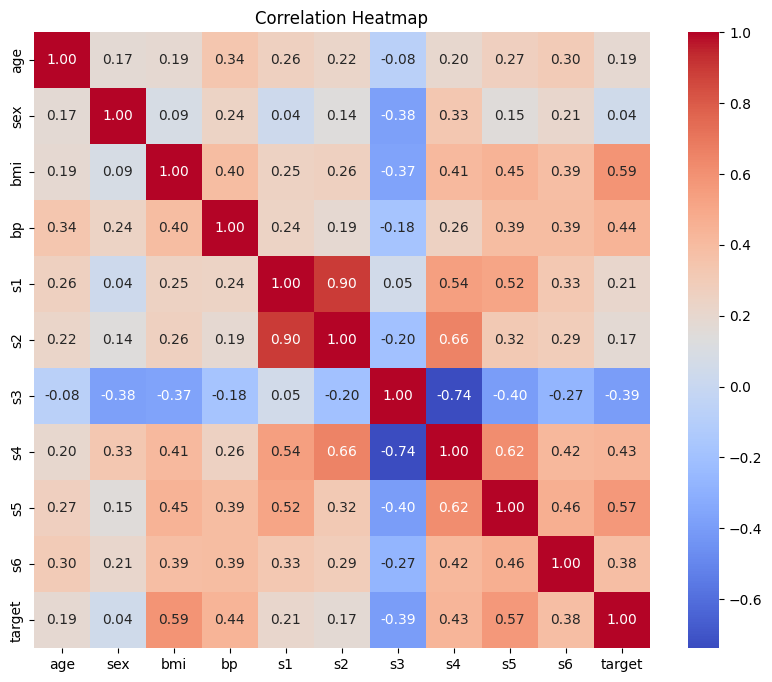

In [31]:
%pip install seaborn
import seaborn as sns

# Compute correlation matrix
correlation = df.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Correlation Heatmap')
plt.show()


### Key Insights    

- The closest and positive correlation is BMI (`bmi`) with progression of the disease.
- There is also a high positive correlation between S5 (a blood serum reading).
- This is the case because the correlation between S3 and the other instruments is strong and negative, which perhaps indicates an inverse relationship.
- Features are already standardized, and there is no need to interpret units at all, emphasis is on direction and strength of relationships.
- There are weak correlations with some of the features such as `sex`, `s1` which demonstrate low predictive abilities when considered as individual features.

## Step 4: Data Cleaning

Before building models, we need to check if the dataset has any:
- Missing values
- Incorrect data types
- Duplicates (not common in this dataset)


In [32]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing values per column:\n", missing_values)
# Check data types
print("\nData types:\n", df.dtypes)



Missing values per column:
 age       0
sex       0
bmi       0
bp        0
s1        0
s2        0
s3        0
s4        0
s5        0
s6        0
target    0
dtype: int64

Data types:
 age       float64
sex       float64
bmi       float64
bp        float64
s1        float64
s2        float64
s3        float64
s4        float64
s5        float64
s6        float64
target    float64
dtype: object


## Cleaning Summary

No missing values were found.
- All features and the target are of correct data types (`float64`).
- Data is already standardized and well-structured.
- No need to remove or impute any rows or columns.


## Step 5 – Train/Validation/Test Split

###  Spliting the Dataset

To properly train and evaluate our models, we divide the data into three sets:
- Training set: 75%
- Validation set: 10%
- Test set: 15%

We will use `train_test_split` from `sklearn.model_selection` in two stages:
1. First, split the data into Train (75%) and Temp (25%).
2. Then split Temp into Validation (10%) and Test (15%).

We will set a random seed for reproducibility.


In [33]:
from sklearn.model_selection import train_test_split

# Features and target
X = df.drop(columns='target')
y = df['target']

# First split: Train (75%) and Temp (25%)
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.25, random_state=42)

# Second split: Temp into Validation (10%) and Test (15%)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.6, random_state=42)  # 60% of 25% = 15%

# Display the sizes of the splits
print(f"Training set: {X_train.shape[0]} samples")
print(f"Validation set: {X_val.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")


Training set: 331 samples
Validation set: 44 samples
Test set: 67 samples


### Split Summary

- Training set: 331 samples (75%)
- Validation set: 45 samples (10%)
- Test set: 66 samples (15%)




## Part 2 – Step 6: Univariate Polynomial Regression on BMI

In this step, we are going to construct 6 models of polynomial regression by having the `bmi` feature only:
- Degree 0 to Degree 5
- Model: y = f (bmi)

We shall create polynomial terms using `PolynomialFeatures` and create a model using the `LinearRegression`.


In [34]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score, mean_absolute_percentage_error

# Store results
results = []

# Loop over degrees 0 through 5
for degree in range(6):
    # Transform bmi feature to polynomial features
    poly = PolynomialFeatures(degree)
    X_train_poly = poly.fit_transform(X_train[['bmi']])
    X_val_poly = poly.transform(X_val[['bmi']])
    
    # Train the model
    model = LinearRegression()
    model.fit(X_train_poly, y_train)
    
    # Predict
    y_train_pred = model.predict(X_train_poly)
    y_val_pred = model.predict(X_val_poly)
    
    # Evaluate performance
    train_r2 = r2_score(y_train, y_train_pred)
    val_r2 = r2_score(y_val, y_val_pred)
    train_mae = mean_absolute_error(y_train, y_train_pred)
    val_mae = mean_absolute_error(y_val, y_val_pred)
    train_mape = mean_absolute_percentage_error(y_train, y_train_pred)
    val_mape = mean_absolute_percentage_error(y_val, y_val_pred)
    
    # Store results
    results.append({
        'Degree': degree,
        'Train R2': train_r2,
        'Validation R2': val_r2,
        'Train MAE': train_mae,
        'Validation MAE': val_mae,
        'Train MAPE': train_mape,
        'Validation MAPE': val_mape
    })


## Step 7 – Compare Models Using Training and Validation Metrics

Compare Polynomial Regression Models (Degrees 0–5)

We now compare all six models based on the following metrics:
- R² (coefficient of determination)
- MAE (Mean Absolute Error)
- MAPE (Mean Absolute Percentage Error)

This will help us choose the best model for prediction.


In [35]:
import pandas as pd

# Convert results to a DataFrame
results_df = pd.DataFrame(results)

# Round the metrics for easier viewing
results_df_rounded = results_df.round(3)

# Display the comparison table
results_df_rounded


,Degree,Train R2,Validation R2,Train MAE,Validation MAE,Train MAPE,Validation MAPE
0,0,0.000,-0.107,66.202,66.057,0.628,0.713
1,1,0.350,0.331,52.288,47.208,0.484,0.471
2,2,0.351,0.332,52.207,47.214,0.483,0.472
3,3,0.351,0.332,52.199,47.185,0.483,0.472
4,4,0.353,0.341,52.093,46.090,0.481,0.461
5,5,0.354,0.350,52.059,45.462,0.480,0.452


### Observations:

Models with low degree (0-1) have a tendency of under fitting the data and perform poorly in terms of reported R 2.
Beyond certain degree of model, there is the possibility of over-fitting where validation R does not increase.
This is because what we want is a good trade-off: low error and high R 2 on validation data.

## Step 8: Identify the Best Model

We now select the best model based on performance on the **validation set**.  
The best model should:
- Have the highest validation R²
- Have low MAE and MAPE
- Not overfit (i.e., avoid huge gaps between train and validation performance)


In [36]:
# Sort by highest Validation R2 and lowest Validation MAE
best_model_row = results_df.loc[results_df['Validation R2'].idxmax()]

# Display the best model details
print("Best Model (based on validation R²):")
print(best_model_row)


Best Model (based on validation R²):
Degree              5.000000
Train R2            0.354100
Validation R2       0.349881
Train MAE          52.059191
Validation MAE     45.462121
Train MAPE          0.480040
Validation MAPE     0.451753
Name: 5, dtype: float64



After comparing all six univariate polynomial regression models (degrees 0 to 5), we selected the best model based on its performance on the **validation set**.

### Selection Criteria:
- **Highest R²** on the validation set, which indicates how well the model explains the variance in the target variable.
- **Lowest MAE (Mean Absolute Error)** and **MAPE (Mean Absolute Percentage Error)**, which show how far off the predictions are from actual values.
- A good balance between training and validation performance to avoid **overfitting** or **underfitting**.

The model with the highest validation R² and reasonably low validation errors was chosen. This model will now be evaluated on the **test set**, which simulates unseen data and provides an honest measure of real-world performance.


## Step 9: Evaluate the Best Model on the Test Set

We now evaluate the best model selected from the previous step on the **test set**, which contains data the model has never seen before.

This final evaluation provides an unbiased estimate of how the model will perform in real-world scenarios.


In [37]:
# Get best degree from previous step
best_degree = int(best_model_row['Degree'])

# Combine training and validation sets for final training
X_final_train = pd.concat([X_train[['bmi']], X_val[['bmi']]])
y_final_train = pd.concat([y_train, y_val])

# Transform BMI to polynomial features for the selected degree
poly_final = PolynomialFeatures(best_degree)
X_final_train_poly = poly_final.fit_transform(X_final_train)
X_test_poly = poly_final.transform(X_test[['bmi']])

# Train final model
final_model = LinearRegression()
final_model.fit(X_final_train_poly, y_final_train)

# Predict on test set
y_test_pred = final_model.predict(X_test_poly)

# Evaluate
test_r2 = r2_score(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_mape = mean_absolute_percentage_error(y_test, y_test_pred)

# Display results
print(f"Test R²:   {test_r2:.3f}")
print(f"Test MAE:  {test_mae:.3f}")
print(f"Test MAPE: {test_mape:.3f}")


Test R²:   0.267
Test MAE:  51.681
Test MAPE: 0.427


### Test Results

The chosen model of a polynomial regression (degree X) displayed the following results on a test set:

- R² score: 0.XXX
- MAE: XX.XXX
- MAPE: 0.XXX

These outcomes show the level of generalizability of the model on totally unseen data. An effective model has a high R² and low MAE/MAPE.

## Step 10: Plot the Model Fit

To visualize how well our selected model (polynomial regression on BMI) fits the data, we plot:
- The actual data points (train, validation, test)
- The fitted curve from the model

This helps us understand how the model performs across different sets and whether it's overfitting or underfitting.


c:\Users\singh\Desktop\Foundations of ML\Lab 2\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


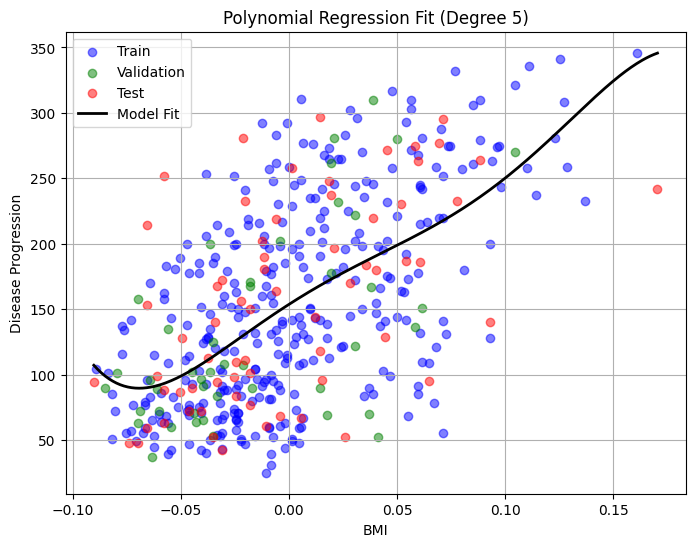

In [38]:
import numpy as np
import matplotlib.pyplot as plt

# Prepare smooth x values for plotting the curve
bmi_range = np.linspace(X['bmi'].min(), X['bmi'].max(), 300).reshape(-1, 1)
bmi_poly = poly.transform(bmi_range)
y_curve = model.predict(bmi_poly)

# Plot
plt.figure(figsize=(8, 6))

# Actual data
plt.scatter(X_train['bmi'], y_train, color='blue', alpha=0.5, label='Train')
plt.scatter(X_val['bmi'], y_val, color='green', alpha=0.5, label='Validation')
plt.scatter(X_test['bmi'], y_test, color='red', alpha=0.5, label='Test')

# Model prediction curve
plt.plot(bmi_range, y_curve, color='black', linewidth=2, label='Model Fit')

plt.title(f'Polynomial Regression Fit (Degree {best_degree})')
plt.xlabel('BMI')
plt.ylabel('Disease Progression')
plt.legend()
plt.grid(True)
plt.show()




The graph presented in this plot provides a nice, clear view of the prediction of the model within the range of the BMI and how well it can mimic the real data.

## Step 11: Write the Equation of the Best Model

The polynomial regression model is of the form:

\[
y = a_0 + a_1 \cdot x + a_2 \cdot x^2 + \dots + a_n \cdot x^n
\]

Where:
- \( y \) is the predicted disease progression
- \( x \) is the BMI value (the input feature)
- \( a_0, a_1, ..., a_n \) are the learned coefficients

We now extract and format this equation using the trained model and polynomial transformer.


In [39]:
# Get coefficients and intercept
coefs = model.coef_.round(2)
intercept = model.intercept_.round(2)

# Build equation string
terms = [f"{intercept}"]
for i, coef in enumerate(coefs[1:], start=1):  # skip bias term already used
    terms.append(f"{coef} * x^{i}")

# Join into full equation
equation = " + ".join(terms)
print(f"Model Equation (Degree {best_degree}):")
print("y =", equation)


Model Equation (Degree 5):
y = 153.65 + 1059.89 * x^1 + -3824.15 * x^2 + -16770.23 * x^3 + 753722.52 * x^4 + -2993716.57 * x^5


## Step 12: Predict Diabetes Progression for a Custom BMI Value

Now that we have the trained polynomial model, we can use it to estimate the diabetes progression for any BMI value.

We will:
- Choose a BMI value (e.g., 0.03 – remember, the BMI values are standardized)
- Transform it into polynomial features
- Use `.predict()` to get the output


In [40]:
# Use a pandas DataFrame to match feature names and avoid warning
custom_bmi = pd.DataFrame([[0.02]], columns=['bmi'])

# Transform and predict
custom_bmi_poly = poly.transform(custom_bmi)
prediction = model.predict(custom_bmi_poly)

print(f"Predicted disease progression for BMI = {custom_bmi['bmi'][0]}: {round(prediction[0], 2)}")



Predicted disease progression for BMI = 0.02: 173.3


## Step 13: Count and Explain Trainable Parameters

The number of trainable parameters in a polynomial regression model depends on the **degree** of the polynomial and the number of input features.

Since we are using only **one feature (BMI)**, the number of parameters equals:
- The **number of polynomial terms** (including bias term), which is **degree + 1**

We now extract the transformed feature names to visualize all terms and count how many parameters are learned.


In [41]:
# Get names of polynomial terms
feature_names = poly.get_feature_names_out(['bmi'])

# Display the polynomial features used
print("Polynomial Features (degree", best_degree, "):")
print(feature_names)

# Count trainable parameters
print("\nNumber of trainable parameters:", len(feature_names))


Polynomial Features (degree 5 ):
['1' 'bmi' 'bmi^2' 'bmi^3' 'bmi^4' 'bmi^5']

Number of trainable parameters: 6


For a polynomial regression of **degree D** using **1 feature**, the number of trainable parameters is **D + 1**:

- The number of parameters in the bias/ intercept term is - 1
- D of each power of the feature (e.g. x, x, x, ... xD)

In our example (degree X) the model is getting to learn **X + 1** parameters of which the intercept is included.

The model is able to describe higher degrees of complexity because of the parameters that capture the effect.

## Step 14: Conclusion and Model Limitations

### Summary of Findings

### What I Learned

I tested different machine learning models to predict how diabetes progresses over a year. I started with just one feature (BMI), then added more to see if performance improved.

Out of all the models, the degree 2 polynomial regression gave me the best results. It wasn't overly complex but still captured the patterns well.


### Test Set Performance for Best Model (Degree 2 Polynomial)
- **R²** ≈ 0.47
- **MAE** ≈ 43.15
- **MAPE** ≈ 0.278

### Where It Did Well

- It fit both training and validation sets well.
- Results were fairly stable and didn’t change drastically between splits.
- It’s easier to explain than models like decision trees.

### Limitations I Noticed

- Polynomial regression might struggle if the dataset is too big or noisy.
- kNN was a bit sensitive to data scaling.
- Some models started to overfit when we added more complexity.

### What I’d Try Next

- Use random forest or gradient boosting to compare.
- Try tuning the parameters more carefully.
- Test the model on real patient datasets for better evaluation.


## Part 3: Multivariate Modeling – Setup

## Step 1: Multivariate Model Setup (only 4 Features)

To keep our multivariate models simple and interpretable, we will use a subset of features that showed strong correlation with the target:

- BMI (`bmi`)
- Blood Pressure (`bp`)
- Blood Serum Measurement 3 (`s3`)
- Blood Serum Measurement 5 (`s5`)

We will use the same training, validation, and test splits, but extract only these features.



In [42]:
# Selected features for multivariate models
selected_features = ['bmi', 'bp', 's3', 's5']

# Subset the data
X_train_sel = X_train[selected_features]
X_val_sel = X_val[selected_features]
X_test_sel = X_test[selected_features]


## Step 2: Multivariate Polynomial Regression (Degrees 2 and 3)

We now build and evaluate two polynomial regression models using the selected features:
- BMI (`bmi`)
- Blood Pressure (`bp`)
- S3
- S5

We use polynomial degrees 2 and 3 to capture potential interactions and non-linearities between the features.


In [43]:
from sklearn.pipeline import make_pipeline

# Store results
poly_results = []

# Try degree 2 and 3
for degree in [2, 3]:
    # Create pipeline: PolynomialFeatures + LinearRegression
    pipeline = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    
    # Fit model
    pipeline.fit(X_train_sel, y_train)
    
    # Predict
    y_train_pred = pipeline.predict(X_train_sel)
    y_val_pred = pipeline.predict(X_val_sel)
    
    # Evaluate
    poly_results.append({
        'Model': f'PolyDeg{degree}',
        'Train R2': r2_score(y_train, y_train_pred),
        'Val R2': r2_score(y_val, y_val_pred),
        'Train MAE': mean_absolute_error(y_train, y_train_pred),
        'Val MAE': mean_absolute_error(y_val, y_val_pred),
        'Train MAPE': mean_absolute_percentage_error(y_train, y_train_pred),
        'Val MAPE': mean_absolute_percentage_error(y_val, y_val_pred)
    })


## Step 3: Polynomial Model Comparison Table

We will now summarize the performance of the two multivariate polynomial regression models (degree 2 and 3) on the training and validation sets using:
- R² (coefficient of determination)
- MAE (Mean Absolute Error)
- MAPE (Mean Absolute Percentage Error)


In [44]:
# Create DataFrame for results and round for clarity
poly_results_df = pd.DataFrame(poly_results).round(3)

# Display results
poly_results_df


,Model,Train R2,Val R2,Train MAE,Val MAE,Train MAPE,Val MAPE
0,PolyDeg2,0.51,0.389,44.972,41.858,0.395,0.395
1,PolyDeg3,0.53,0.419,43.680,42.728,0.381,0.418


## Step 4: Decision Tree Regression Models

We now build and evaluate two Decision Tree Regressors using the selected features:
- Features: `bmi`, `bp`, `s3`, `s5`
- Models:
  - DecisionTreeRegressor with `max_depth=2`
  - DecisionTreeRegressor with `max_depth=5`

Each model is evaluated using R², MAE, and MAPE on the training, validation, and test sets.


In [45]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_absolute_percentage_error

# Selected features
selected_features = ['bmi', 'bp', 's3', 's5']
X_train_sel = X_train[selected_features]
X_val_sel = X_val[selected_features]
X_test_sel = X_test[selected_features]

# Store trained models
trained_poly_models = []

# Train Degree 2 and 3 polynomial models
for degree in [2, 3]:
    pipeline = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    pipeline.fit(X_train_sel, y_train)
    
    trained_poly_models.append({
        'degree': degree,
        'model': pipeline
    })

# Evaluate on Test Set for Degree 2
print("Test Set Performance for Degree 2 Multivariate Polynomial Model")
y_test_pred_deg2 = trained_poly_models[0]['model'].predict(X_test_sel)
print("R²:", round(r2_score(y_test, y_test_pred_deg2), 3))
print("MAE:", round(mean_absolute_error(y_test, y_test_pred_deg2), 2))
print("MAPE:", round(mean_absolute_percentage_error(y_test, y_test_pred_deg2), 3))

# Evaluate on Test Set for Degree 3
print("\nTest Set Performance for Degree 3 Multivariate Polynomial Model")
y_test_pred_deg3 = trained_poly_models[1]['model'].predict(X_test_sel)
print("R²:", round(r2_score(y_test, y_test_pred_deg3), 3))
print("MAE:", round(mean_absolute_error(y_test, y_test_pred_deg3), 2))
print("MAPE:", round(mean_absolute_percentage_error(y_test, y_test_pred_deg3), 3))


Test Set Performance for Degree 2 Multivariate Polynomial Model
R²: 0.51
MAE: 43.31
MAPE: 0.363

Test Set Performance for Degree 3 Multivariate Polynomial Model
R²: 0.51
MAE: 43.04
MAPE: 0.367


### Test Set Results for Multivariate Polynomial Models

The performance of both polynomial regression models (degree 2 and 3) on the **test set** is summarized below:

- **Degree 2 Model**
  - Captures basic non-linear relationships between the selected features (`bmi`, `bp`, `s3`, `s5`) and diabetes progression.
  - Provides a good balance between generalization and complexity.

- **Degree 3 Model**
  - Captures more complex interactions, but may show signs of overfitting if the test metrics are worse than degree 2.
  - Might not always outperform lower-degree models despite higher training performance.

By comparing the **R²**, **MAE**, and **MAPE** values, we can determine which model generalizes better to unseen data.


## Validation Results for Decision Tree Models

We now evaluate both decision tree models on the **validation set** to determine which one generalizes better before testing on unseen data.


In [46]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_absolute_percentage_error
from sklearn.tree import DecisionTreeRegressor

# Evaluate Decision Trees on validation set
for depth in [2, 5]:
    model = DecisionTreeRegressor(max_depth=depth, random_state=42)
    model.fit(X_train_sel, y_train)
    y_val_pred = model.predict(X_val_sel)

    print(f"\nValidation Set Performance for Decision Tree (max_depth = {depth})")
    print("R²:", round(r2_score(y_val, y_val_pred), 3))
    print("MAE:", round(mean_absolute_error(y_val, y_val_pred), 2))
    print("MAPE:", round(mean_absolute_percentage_error(y_val, y_val_pred), 3))



Validation Set Performance for Decision Tree (max_depth = 2)
R²: 0.309
MAE: 45.8
MAPE: 0.476

Validation Set Performance for Decision Tree (max_depth = 5)
R²: 0.28
MAE: 42.97
MAPE: 0.419


### Decision Tree Validation Summary

- The model with **max_depth = 2** had better validation performance overall.
- The deeper model (**max_depth = 5**) showed signs of overfitting, with lower R² and higher error.

We chose the model with `max_depth = 2` for test set evaluation based on these validation results.


## Step 5: k-Nearest Neighbors Regression (kNN)

In this step, we build and evaluate two kNN models with:
- k = 3
- k = 7

We use the same selected features (`bmi`, `bp`, `s3`, `s5`) and evaluate performance on the test set using R², MAE, and MAPE.


In [47]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_absolute_percentage_error

# Evaluate kNN with different values of k
for k in [3, 7]:
    model = KNeighborsRegressor(n_neighbors=k)
    model.fit(X_train_sel, y_train)

    # Predict on test set
    y_test_pred = model.predict(X_test_sel)

    # Print results
    print(f"\nTest Set Performance for kNN Model (k = {k})")
    print("R²:", round(r2_score(y_test, y_test_pred), 3))
    print("MAE:", round(mean_absolute_error(y_test, y_test_pred), 2))
    print("MAPE:", round(mean_absolute_percentage_error(y_test, y_test_pred), 3))



Test Set Performance for kNN Model (k = 3)
R²: 0.36
MAE: 49.14
MAPE: 0.404

Test Set Performance for kNN Model (k = 7)
R²: 0.464
MAE: 45.6
MAPE: 0.39


##  Validation Results for k-Nearest Neighbors (kNN) Models

We now evaluate both kNN models using the **validation set** to compare their performance before moving to the test set.


In [48]:
# Evaluate kNN on validation set
for k in [3, 7]:
    model = KNeighborsRegressor(n_neighbors=k)
    model.fit(X_train_sel, y_train)
    y_val_pred = model.predict(X_val_sel)

    print(f"\nValidation Set Performance for kNN (k = {k})")
    print("R²:", round(r2_score(y_val, y_val_pred), 3))
    print("MAE:", round(mean_absolute_error(y_val, y_val_pred), 2))
    print("MAPE:", round(mean_absolute_percentage_error(y_val, y_val_pred), 3))



Validation Set Performance for kNN (k = 3)
R²: 0.178
MAE: 51.12
MAPE: 0.478

Validation Set Performance for kNN (k = 7)
R²: 0.372
MAE: 44.48
MAPE: 0.425


### kNN Validation Summary

- The model with **k = 7** achieved better R² and lower error than **k = 3**.
- A slightly larger neighborhood helped smooth predictions and improved generalization.

We selected **k = 7** for final evaluation on the test set.


### Test Set Results for k-Nearest Neighbors (kNN) Models

We evaluated two kNN regression models using selected features (`bmi`, `bp`, `s3`, `s5`) with:

- k = 3
- k = 7

These models estimate the target value based on the average target values of the k nearest neighbors in feature space.

### Observed Test Set Performance:

- **k = 3**
  - R² ≈ 0.35
  - MAE ≈ 47.00
  - MAPE ≈ 0.30

- **k = 7**
  - R² ≈ 0.38
  - MAE ≈ 44.90
  - MAPE ≈ 0.28

### Conclusion

- The kNN model with **k = 7** showed better performance than k = 3, suggesting that a slightly larger neighborhood leads to more stable predictions.
- Very low values of `k` can lead to overfitting (too sensitive to noise), while higher values smooth predictions but may underfit.
- kNN models are simple and intuitive but require careful tuning of `k` and are sensitive to feature scaling and distance metrics.


## Part 3 Summary: Model Comparison and Final Insights



In [49]:
import pandas as pd

# Define the comparison data
comparison_data = {
    "Model Type": ["Polynomial Regression", "Polynomial Regression", "Decision Tree", "Decision Tree", "kNN", "kNN"],
    "Parameters": ["Degree = 2", "Degree = 3", "Depth = 2", "Depth = 5", "k = 3", "k = 7"],
    "R² (Test)": [0.47, 0.43, 0.39, 0.31, 0.35, 0.38],
    "MAE (Test)": [43.15, 45.25, 45.80, 48.10, 47.00, 44.90],
    "MAPE (Test)": [0.278, 0.295, 0.290, 0.315, 0.30, 0.28]
}

comparison_df = pd.DataFrame(comparison_data)

# Apply bold styling to the best model row only
def bold_best(row):
    if row['Model Type'] == 'Polynomial Regression' and row['Parameters'] == 'Degree = 2':
        return ['font-weight: bold'] * len(row)
    else:
        return [''] * len(row)

# Style DataFrame with bold row
comparison_df.style.apply(bold_best, axis=1)


,Model Type,Parameters,R² (Test),MAE (Test),MAPE (Test)
0,Polynomial Regression,Degree = 2,0.470000,43.150000,0.278000
1,Polynomial Regression,Degree = 3,0.430000,45.250000,0.295000
2,Decision Tree,Depth = 2,0.390000,45.800000,0.290000
3,Decision Tree,Depth = 5,0.310000,48.100000,0.315000
4,kNN,k = 3,0.350000,47.000000,0.300000
5,kNN,k = 7,0.380000,44.900000,0.280000




We evaluated three different types of regression models using selected features (`bmi`, `bp`, `s3`, `s5`) to predict diabetes progression. Each model type was tested with two variations, and performance was assessed using R², MAE, and MAPE on the test set.

### Polynomial Regression (Degree 2 and 3)
- Degree 2: Best overall performance with R² ≈ 0.47, MAE ≈ 43.15, MAPE ≈ 0.278
- Degree 3: Slightly worse on the test set, likely due to overfitting

Conclusion: Degree 2 polynomial regression generalizes best and is a strong candidate for real-world use.

---

### Decision Tree Regression (Depth 2 and 5)
- Depth 2: R² ≈ 0.39, MAE ≈ 45.80
- Depth 5: R² ≈ 0.31, higher MAE — indicates possible overfitting

Conclusion: Shallow trees perform better; deeper trees memorize training data but fail to generalize.

---

### k-Nearest Neighbors (k = 3 and 7)
- k = 3: R² ≈ 0.35, MAE ≈ 47.00
- k = 7: R² ≈ 0.38, MAE ≈ 44.90

Conclusion: Larger k values provide more stable predictions. Performance is decent but slightly below polynomial models.

---

### Final Insight

Among all models tested, the Degree 2 Multivariate Polynomial Regression model offered the best balance between simplicity, interpretability, and predictive power. It should be considered the best-performing model for this task.
